In [1]:
import seaborn as sns
import torch
import numpy as np

### Choose the root of KD
balabala

In [2]:
!ls save/student_datafree_model/

S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_0_5000_g_100
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_0_deepinv
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_0_k_10_3000_100
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_0_k_10_3000_120
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_0_k_10_3000_150
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_0_k_10_5000_50
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_0_k_10_5000_70
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_0_k_10_5000_80
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_0_k_rr
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_1_5000_g_100
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_1_deepinv
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_1_k_10_3000_100
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_1_k_10_3000_120
S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_1_k_10_3000_150
S:resnet8x4_T:resnet32x4_cifar100_kd

In [4]:
logos = ['k_10']
for logo in logos:
    scores = []
    for i in range(10):
        pths = torch.load('save/student_datafree_model/S:resnet8x4_T:resnet32x4_svhn_kd_r:0.4_a:0.6_b:0.0_{}_{}/resnet8x4_best.pth'.format(i, logo))
        acc = pths['best_acc']
        scores.append(acc.item())
    scores = np.asarray(scores)
    print('T:resnet32x4, S:resnet8x4, logo:{},  acc:{} +- {}'.format(logo, np.mean(scores), np.var(scores) ** 0.5))

T:resnet32x4, S:resnet8x4, logo:k_10,  acc:93.28749084472656 +- 0.17234420576255796


In [5]:
logos = [ '5000_g_100']
data = []
for logo in logos:
    scores = []
    for i in range(6):
        pths = torch.load('save/student_datafree_model/S:resnet8x4_T:resnet32x4_cifar100_kd_r:0.3_a:0.7_b:0.0_{}_{}/resnet8x4_best.pth'.format(i, logo))
        acc = pths['best_acc']
        scores.append(acc.item())
    scores = np.asarray(scores)
    data.append(scores)
    print('T:resnet32x4, S:resnet8x4, logo:{},  acc:{} +- {}'.format(logo, np.mean(scores), np.var(scores) ** 0.5))

data = np.asarray(data)

T:resnet32x4, S:resnet8x4, logo:5000_g_100,  acc:51.35999870300293 +- 0.16862206703297866


In [13]:
import pandas as pd
columns = [  'k_1', 'k_3', 'k_5', 'k_7', 'k_10', 'NoLc']
real_data = pd.DataFrame(data=data.T, columns=columns)
real_data

,k_1,k_3,k_5,k_7,k_10,NoLc
0,48.750000,49.889999,49.209999,49.219997,49.360001,46.989998
1,49.340000,49.590000,48.899998,49.270000,48.989998,47.360001
2,49.180000,49.209999,49.029999,48.070000,49.360001,47.549999
3,49.610001,49.139999,48.489998,48.320000,50.259998,46.820000
4,49.759998,48.840000,48.969997,48.590000,50.059998,48.009998
5,49.389999,48.969997,48.910000,48.529999,49.889999,47.799999
6,49.020000,49.250000,49.270000,48.379997,49.949997,46.919998
7,49.520000,48.629997,48.889999,48.079998,49.799999,47.699997
8,49.520000,49.469997,48.160000,49.090000,50.020000,46.919998
9,49.160000,48.939999,49.250000,48.629997,50.500000,47.750000


Text(0, 0.5, 'Student Acc.')

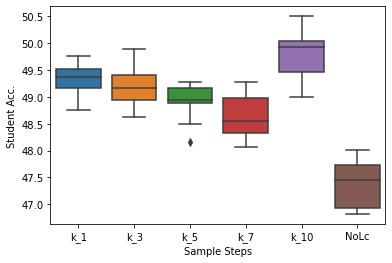

In [14]:
ax = sns.boxplot(data=real_data)
ax.set_xlabel('Sample Steps')
ax.set_ylabel('Student Acc.')